## Importing the libraries

In [ ]:
!pip install torch torchvision torchaudio
!pip install matplotlib numpy pandas

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## 1. 載入 MNIST 數據集
- 從 TensorFlow 內建的資料集中，載入 MNIST 數字手寫資料集的「訓練資料」部分

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 256

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100.0%
100.0%
100.0%
100.0%


## 2. 建立生成器（Generator）

In [6]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 7*7*256),
            nn.BatchNorm1d(7*7*256),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Unflatten(1, (256, 7, 7)),
            
            nn.ConvTranspose2d(256, 128, kernel_size=5, stride=1, padding=2, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

## 3. 建立鑑別器（Discriminator）

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Flatten(),
            nn.Linear(7*7*128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

## 4. 初始化模型與優化器

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0002, betas=(0.5, 0.999))

cuda


## 5. 訓練模型

Epoch [1/50]  D Loss: 1.3377  G Loss: 0.8519


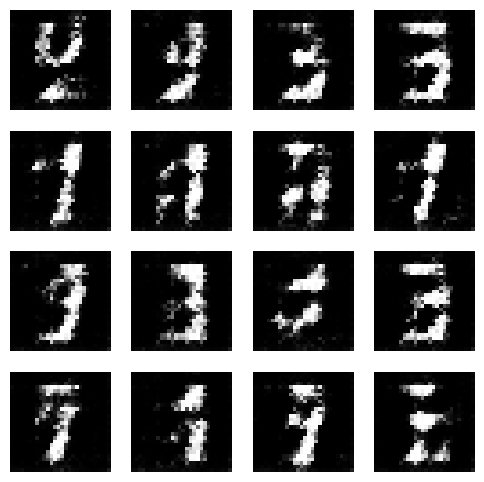

Epoch [2/50]  D Loss: 1.3159  G Loss: 0.8048


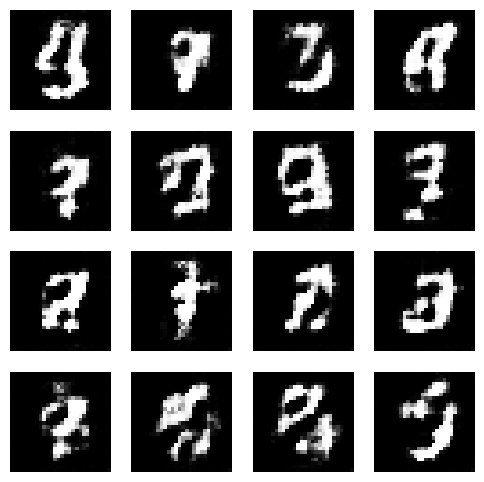

Epoch [3/50]  D Loss: 1.2365  G Loss: 1.1207


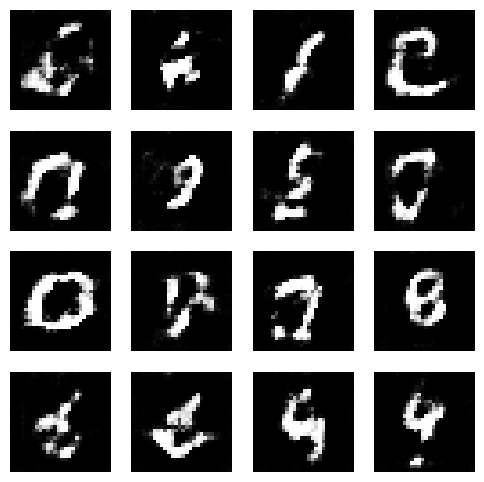

Epoch [4/50]  D Loss: 1.2754  G Loss: 0.7586


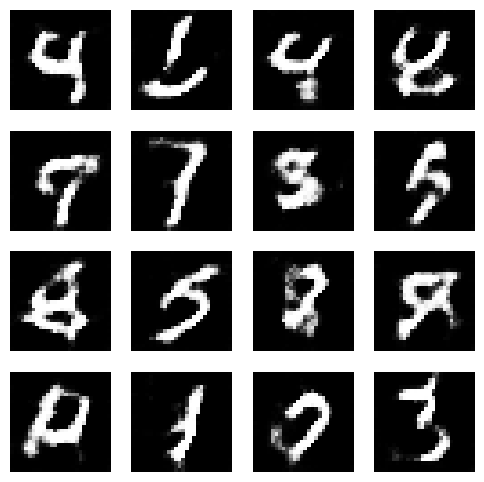

Epoch [5/50]  D Loss: 1.3971  G Loss: 0.7707


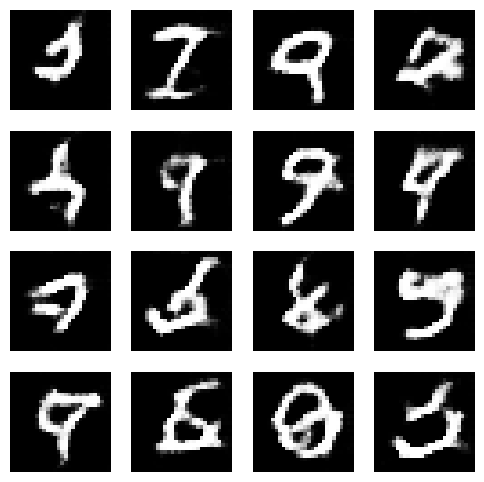

Epoch [6/50]  D Loss: 1.3487  G Loss: 0.7793


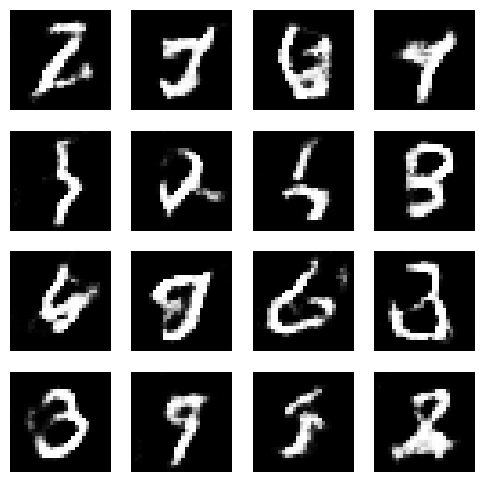

Epoch [7/50]  D Loss: 1.3608  G Loss: 0.8008


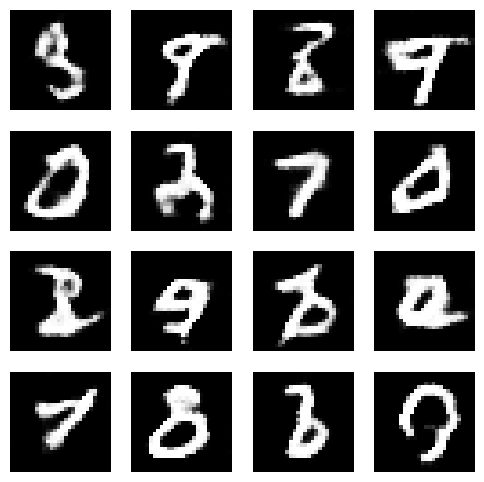

Epoch [8/50]  D Loss: 1.3043  G Loss: 0.7446


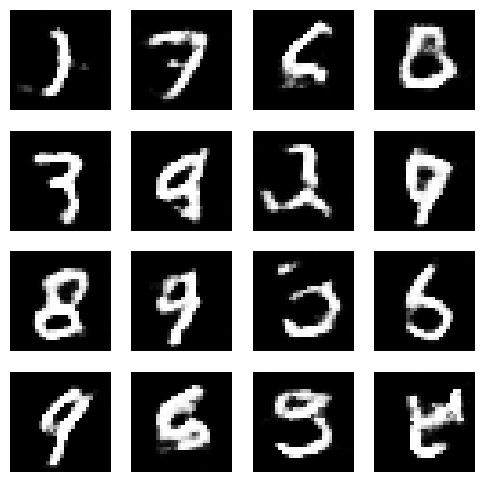

Epoch [9/50]  D Loss: 1.3082  G Loss: 0.7748


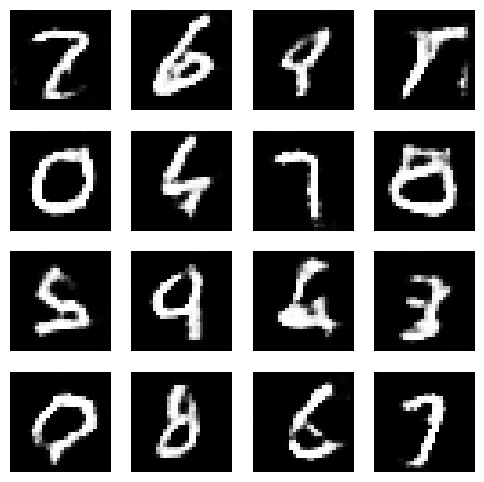

Epoch [10/50]  D Loss: 1.3096  G Loss: 0.8938


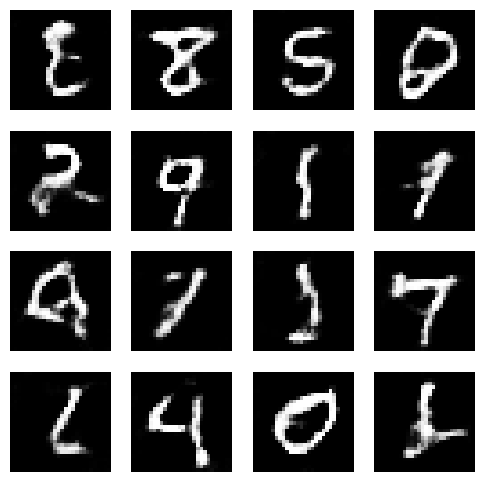

Epoch [11/50]  D Loss: 1.3295  G Loss: 0.7774


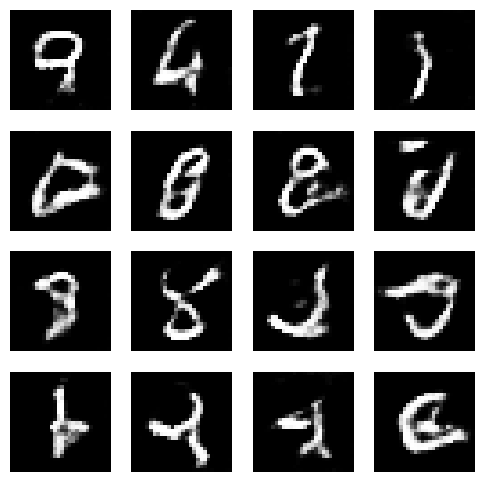

Epoch [12/50]  D Loss: 1.2170  G Loss: 0.8446


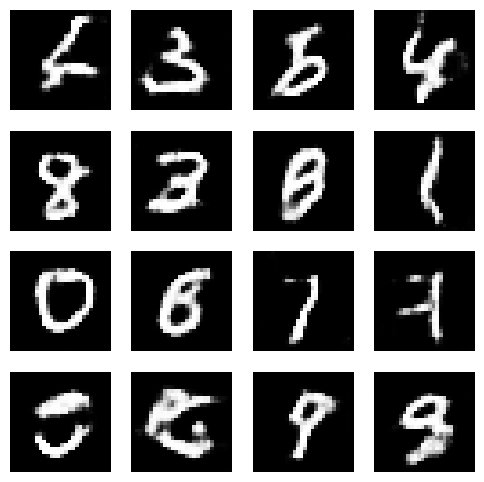

Epoch [13/50]  D Loss: 1.2771  G Loss: 0.7718


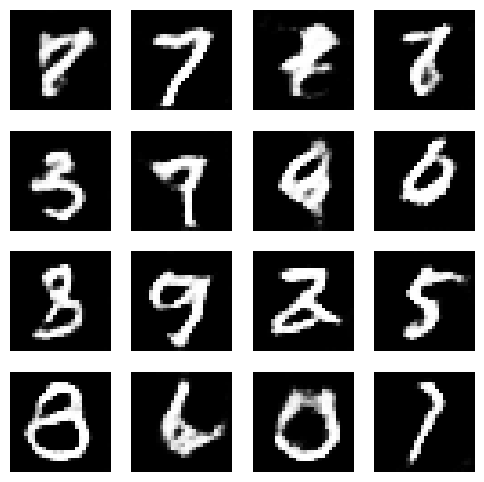

Epoch [14/50]  D Loss: 1.3562  G Loss: 0.8700


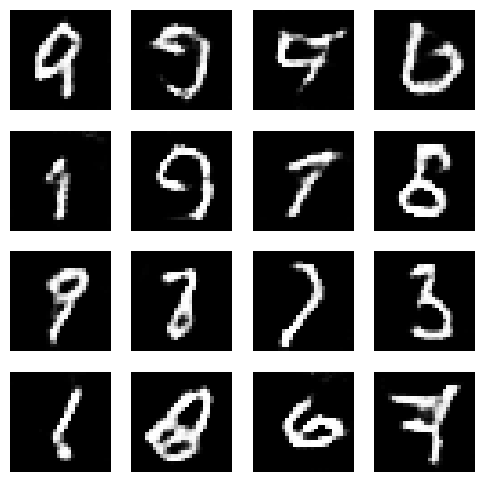

Epoch [15/50]  D Loss: 1.3445  G Loss: 0.7073


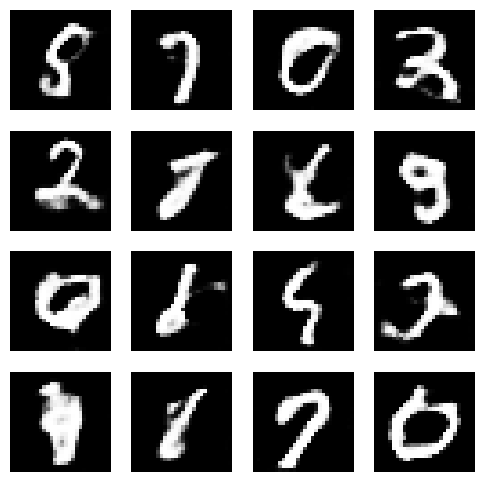

Epoch [16/50]  D Loss: 1.3126  G Loss: 0.8298


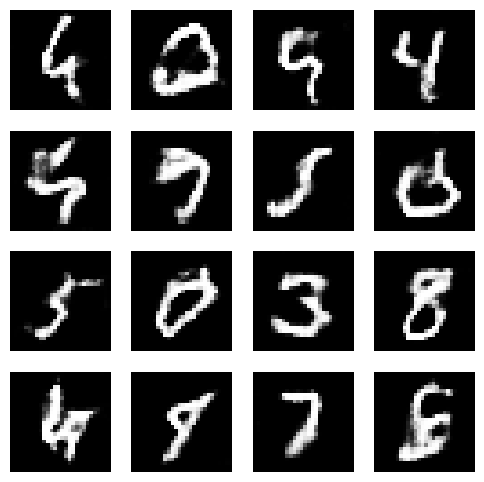

Epoch [17/50]  D Loss: 1.3396  G Loss: 0.6976


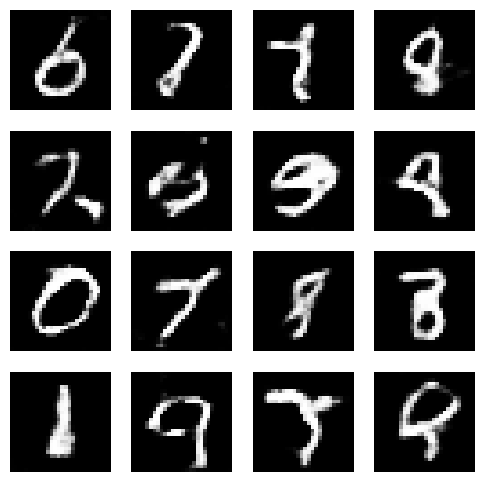

Epoch [18/50]  D Loss: 1.3333  G Loss: 0.7655


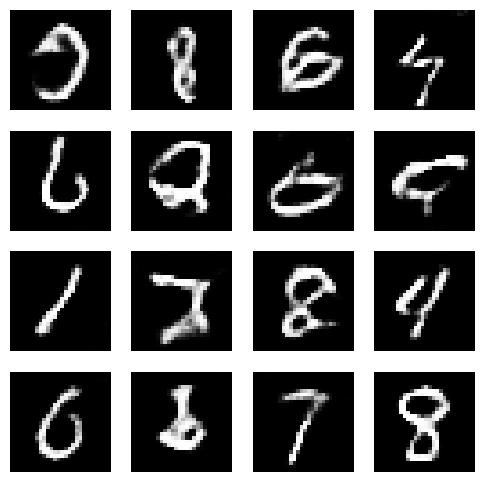

Epoch [19/50]  D Loss: 1.3230  G Loss: 0.7104


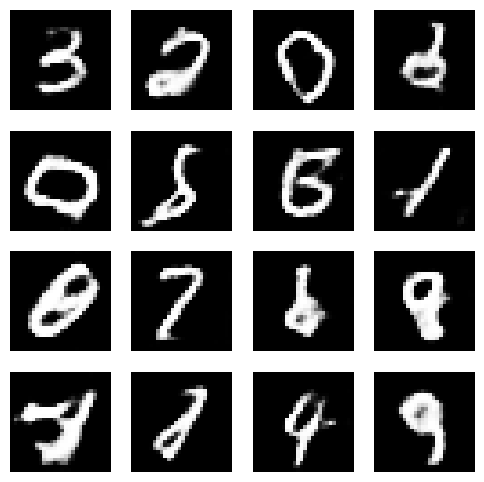

Epoch [20/50]  D Loss: 1.2980  G Loss: 0.7900


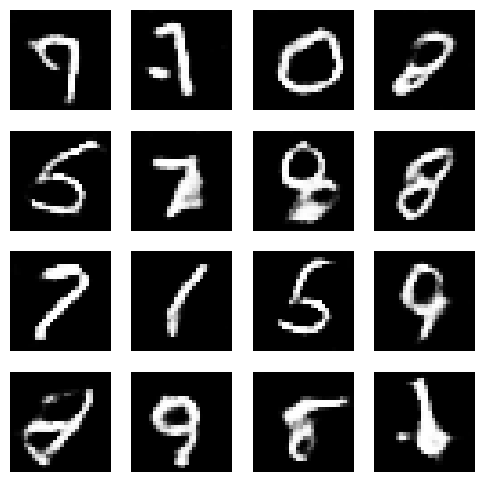

Epoch [21/50]  D Loss: 1.2917  G Loss: 0.8537


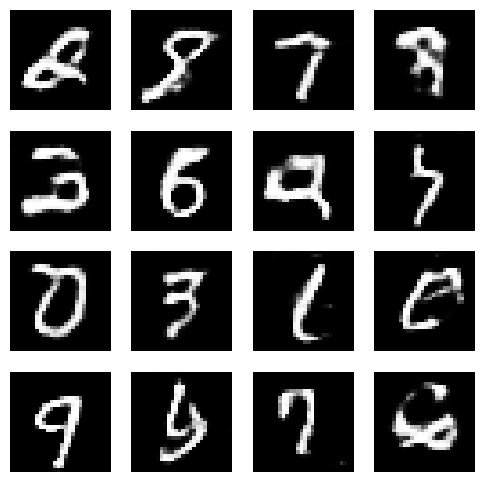

Epoch [22/50]  D Loss: 1.2258  G Loss: 0.7936


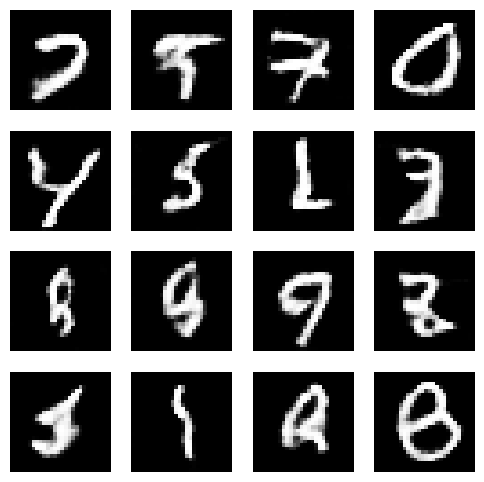

Epoch [23/50]  D Loss: 1.2802  G Loss: 0.8207


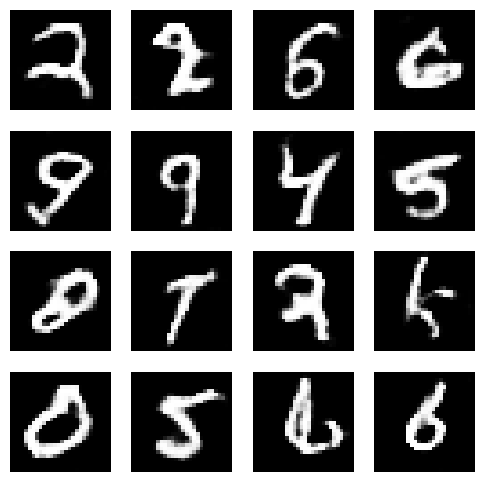

Epoch [24/50]  D Loss: 1.3531  G Loss: 0.8292


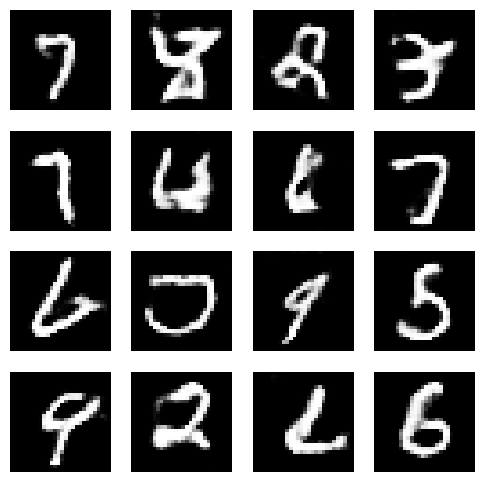

Epoch [25/50]  D Loss: 1.3522  G Loss: 0.9287


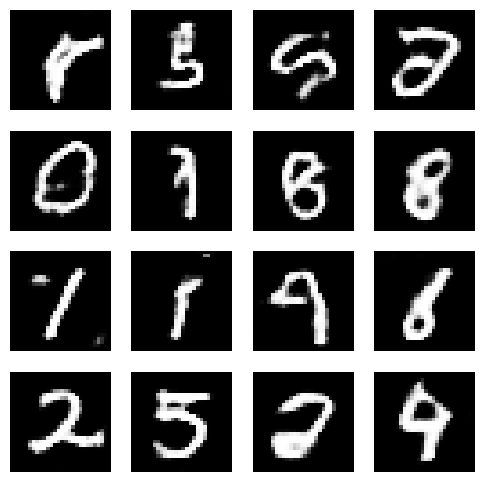

Epoch [26/50]  D Loss: 1.2923  G Loss: 0.8639


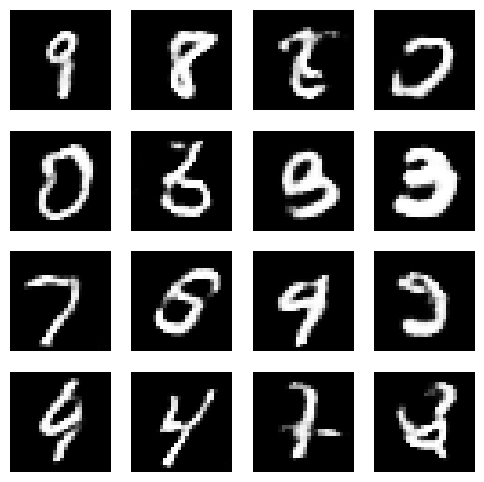

Epoch [27/50]  D Loss: 1.3276  G Loss: 0.8299


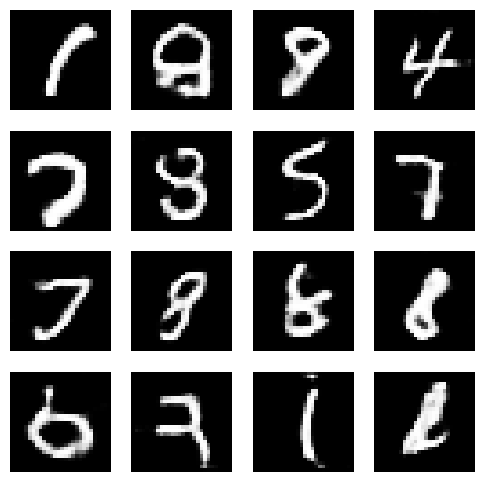

Epoch [28/50]  D Loss: 1.3643  G Loss: 0.7689


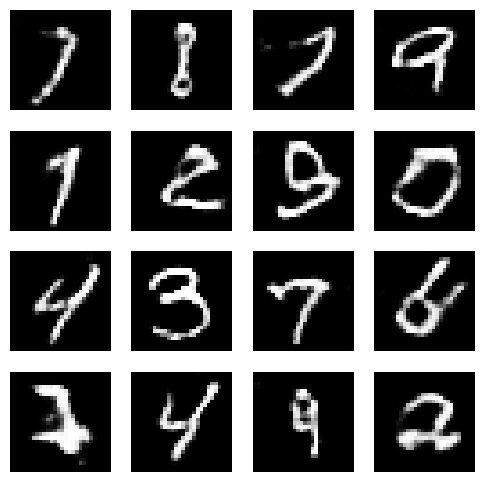

Epoch [29/50]  D Loss: 1.3918  G Loss: 0.7184


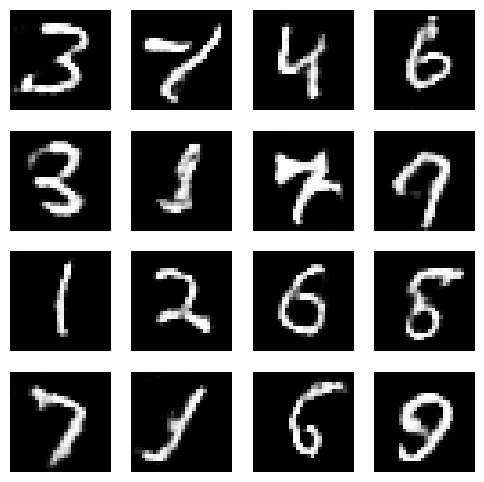

Epoch [30/50]  D Loss: 1.3034  G Loss: 0.7440


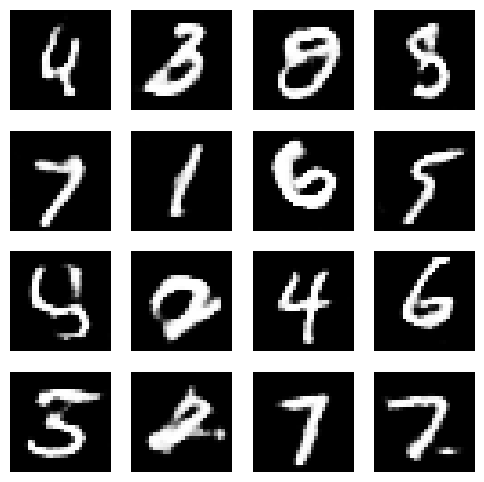

Epoch [31/50]  D Loss: 1.2867  G Loss: 0.8195


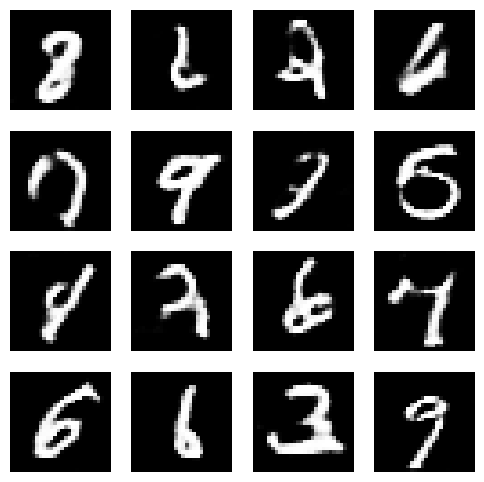

Epoch [32/50]  D Loss: 1.3149  G Loss: 0.7762


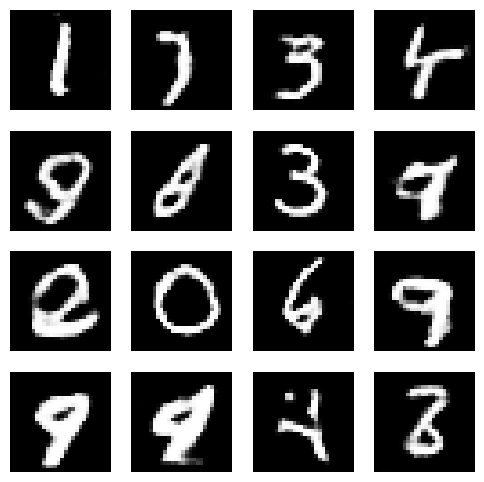

Epoch [33/50]  D Loss: 1.3548  G Loss: 0.7405


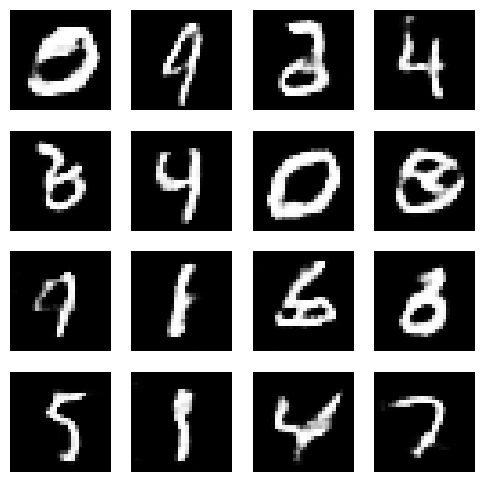

Epoch [34/50]  D Loss: 1.3439  G Loss: 0.9335


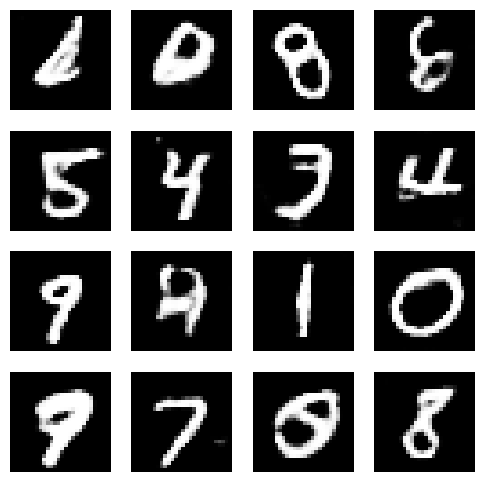

Epoch [35/50]  D Loss: 1.2961  G Loss: 0.8315


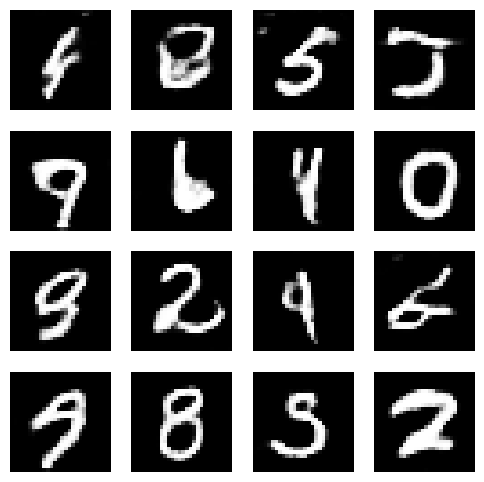

Epoch [36/50]  D Loss: 1.3084  G Loss: 0.8250


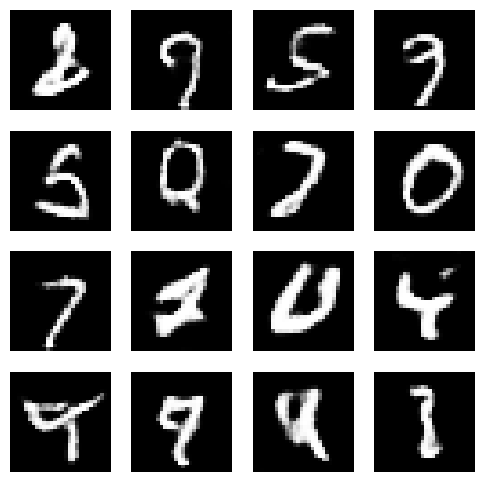

Epoch [37/50]  D Loss: 1.3333  G Loss: 0.7488


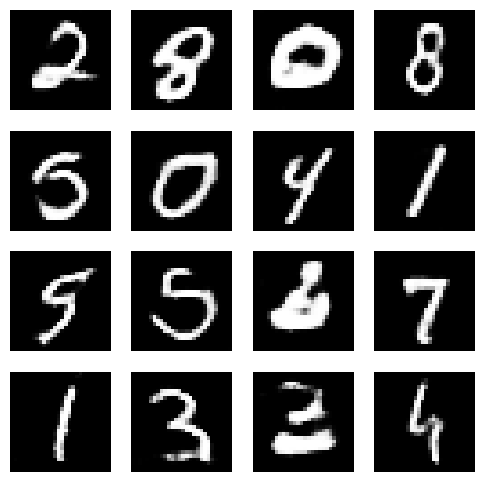

Epoch [38/50]  D Loss: 1.3279  G Loss: 0.8107


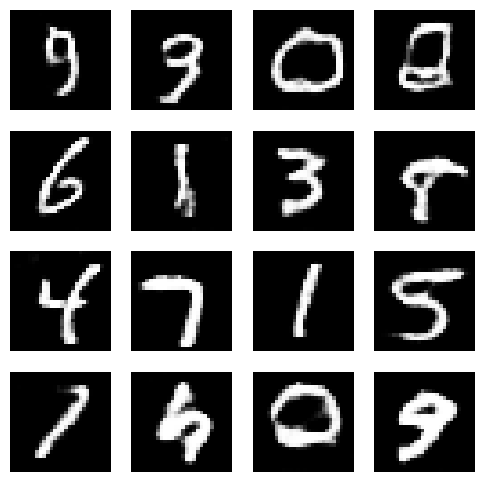

Epoch [39/50]  D Loss: 1.3453  G Loss: 0.9185


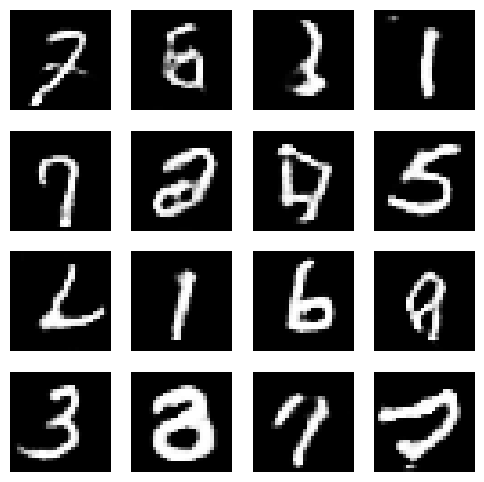

Epoch [40/50]  D Loss: 1.3703  G Loss: 0.8312


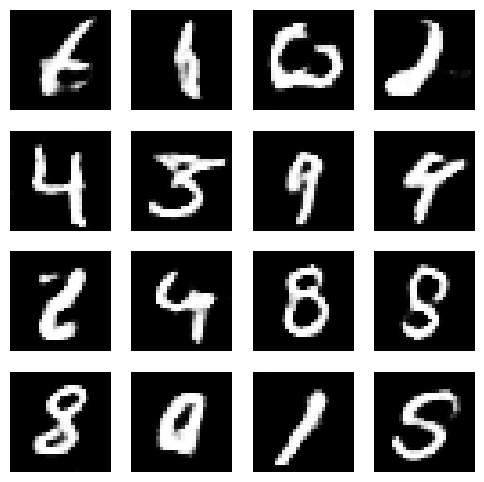

Epoch [41/50]  D Loss: 1.3524  G Loss: 0.7881


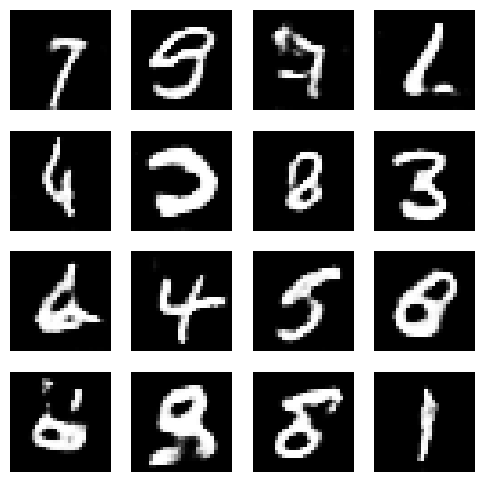

Epoch [42/50]  D Loss: 1.3482  G Loss: 0.8144


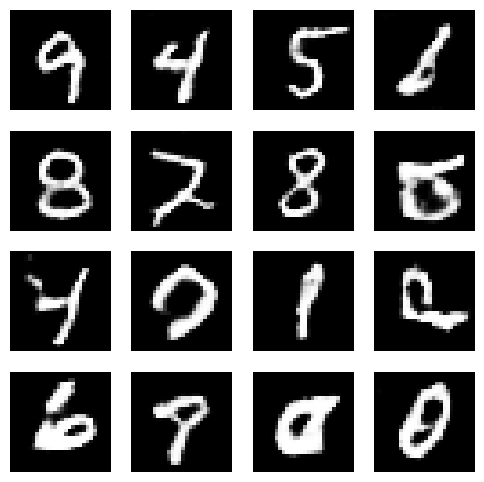

Epoch [43/50]  D Loss: 1.3324  G Loss: 0.8524


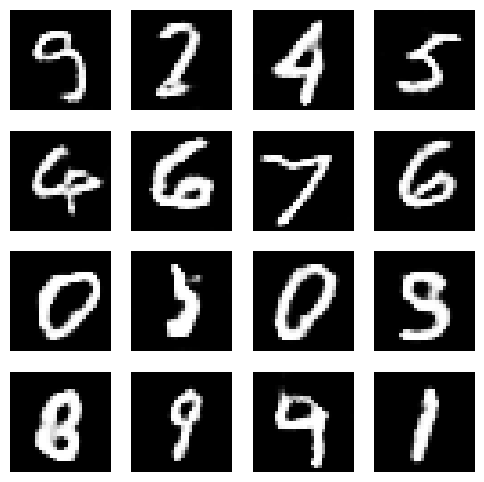

Epoch [44/50]  D Loss: 1.3749  G Loss: 0.9215


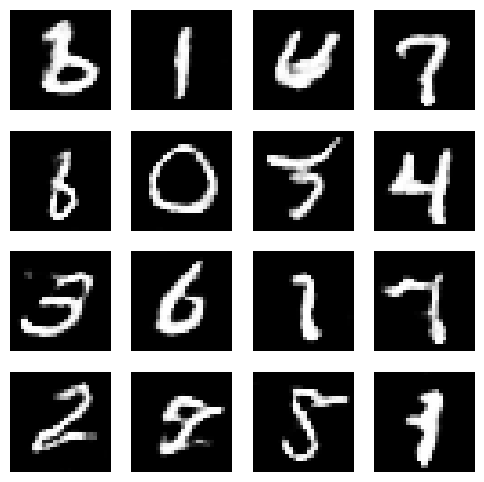

Epoch [45/50]  D Loss: 1.2975  G Loss: 0.8929


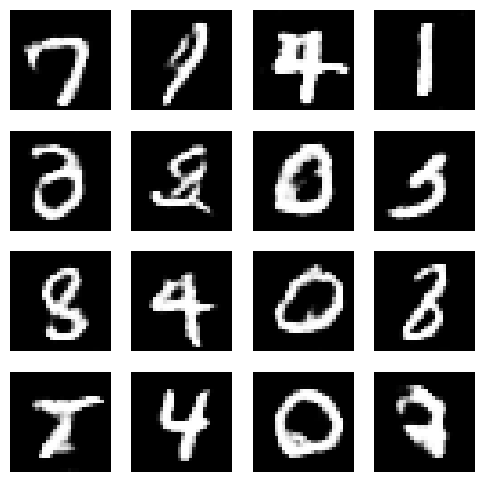

Epoch [46/50]  D Loss: 1.3464  G Loss: 0.7694


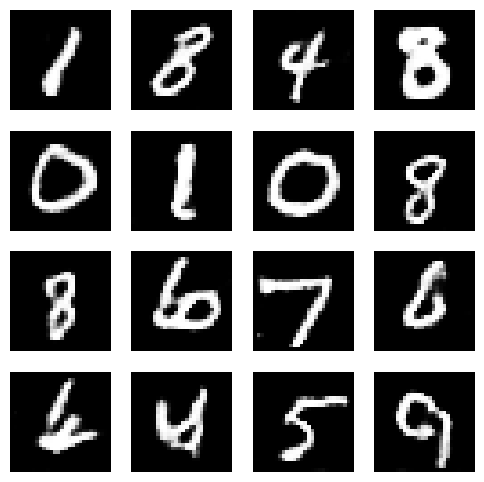

Epoch [47/50]  D Loss: 1.2659  G Loss: 0.6573


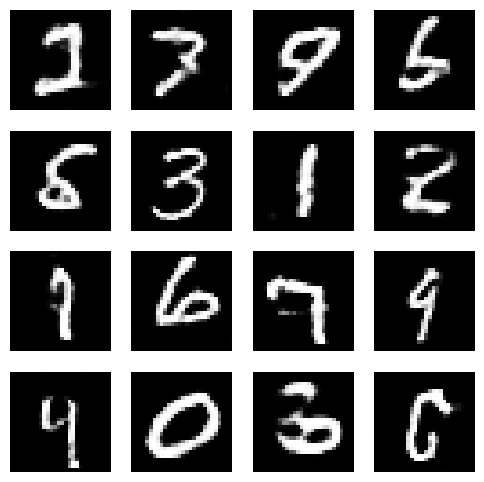

Epoch [48/50]  D Loss: 1.3325  G Loss: 0.9382


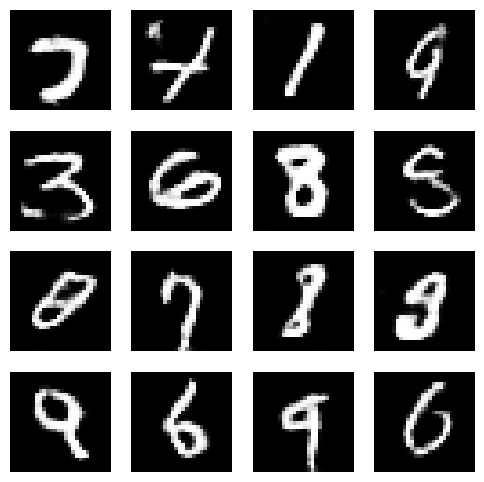

Epoch [49/50]  D Loss: 1.3074  G Loss: 0.7960


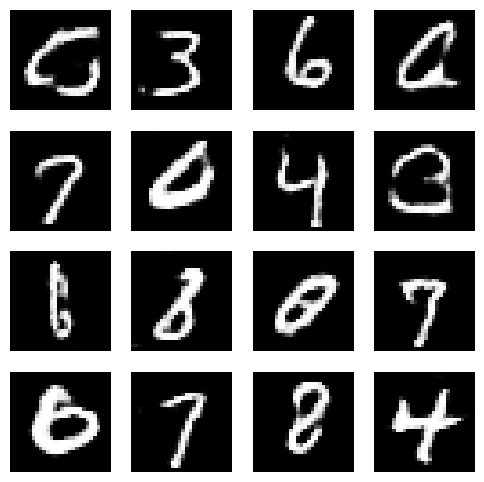

Epoch [50/50]  D Loss: 1.3631  G Loss: 0.8308


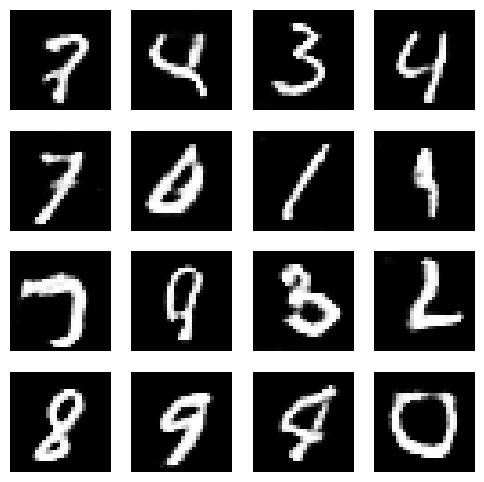

In [11]:
num_epochs = 50

for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.size(0)
        real_images = real_images.to(device)

        # 生成標籤
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # 訓練鑑別器 D
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)

        z = torch.randn(batch_size, 100).to(device)
        fake_images = G(z)
        outputs = D(fake_images.detach())
        d_loss_fake = criterion(outputs, fake_labels)

        d_loss = d_loss_real + d_loss_fake

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

        # 訓練生成器 G
        z = torch.randn(batch_size, 100).to(device)
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)

        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch+1}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}')

    # 每個 epoch 畫出幾張生成的圖
    with torch.no_grad():
        z = torch.randn(16, 100).to(device)
        generated = G(z).cpu()
        generated = generated * 0.5 + 0.5  # 反標準化回 [0,1]

        fig, axs = plt.subplots(4, 4, figsize=(6,6))
        for i in range(16):
            axs[i//4, i%4].imshow(generated[i].squeeze(), cmap='gray')
            axs[i//4, i%4].axis('off')
        plt.show()